# App Behavior Analysis

## 앱 행동 분석을 통해 고객을 구독제품으로 안내하는 프로젝트

## 이 프로젝트의 대상은 회사의 무료제품을 사용하는 고객
## 프로젝트의 목표 : 무료 유저를 유료 멤버로 전환하는 것

## 유료버전의 앱을 등록할 가능성이 없는 유저를 식별하는 모델을 구축


### 데이터 설명

#### 앱 사용 데이터는 앱을 처음 연후 처음 24시간 동안의 데이터
#### 무료 평가판이 24시간 후 만료
* first_open : 최초로 앱을 연 날짜와 시간
* dayofweek : 숫자형식의 요일, 0 = 일요일, 6 = 토요일
* hour : 앱을 처음 연 시간
* screen_list : 유저가 방문한 모든 단일 화면 이름
* numscreens : screen_list에 표시되는 화면의 수
* minigame : 미니게임을 한다면 1 안한다면 0
* used_premium_feature : 유료기능을 사용하면 1
* liked : 어떤 기능에 좋아요를 누르면 1, 누르지 않으면 0
* enrolled	 : 반응변수, 체험판 종료 후 유료 제품 등록하면 1
* enrolled_date : 유료제품 등록시 언제 등록했는지, 제한되지 않은 유일한 열, 1년 후나 2년후에 등록해도 상관없음. 우리가 측정해야하는 것

## IMPORTING THE LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dateutil - powerful extensions to datetime
# to parse all sorts of different date and datetime string formats
# parsing : 문자열로부터 날짜 패턴을 자동으로 인식하여 datetime객체로 변환해주는 것
# 문자열을 넣어주면 해당 문자열을 해석하여 datetime객체로 변환

from dateutil import parser


In [2]:
dataset = pd.read_csv('input/appdata10.csv')
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


## EDA

In [3]:
# describe() = 수치형 변수들의 통계정보를 볼 수 있음
dataset.describe()

# hour column이 날짜형식의 문자열이라 안보임

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [4]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)
dataset['hour'].head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int32

In [5]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


## Plotting

In [6]:
dataset2 = dataset.copy().drop(columns=['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

# 수치형 열만 남아있음

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## Histogram

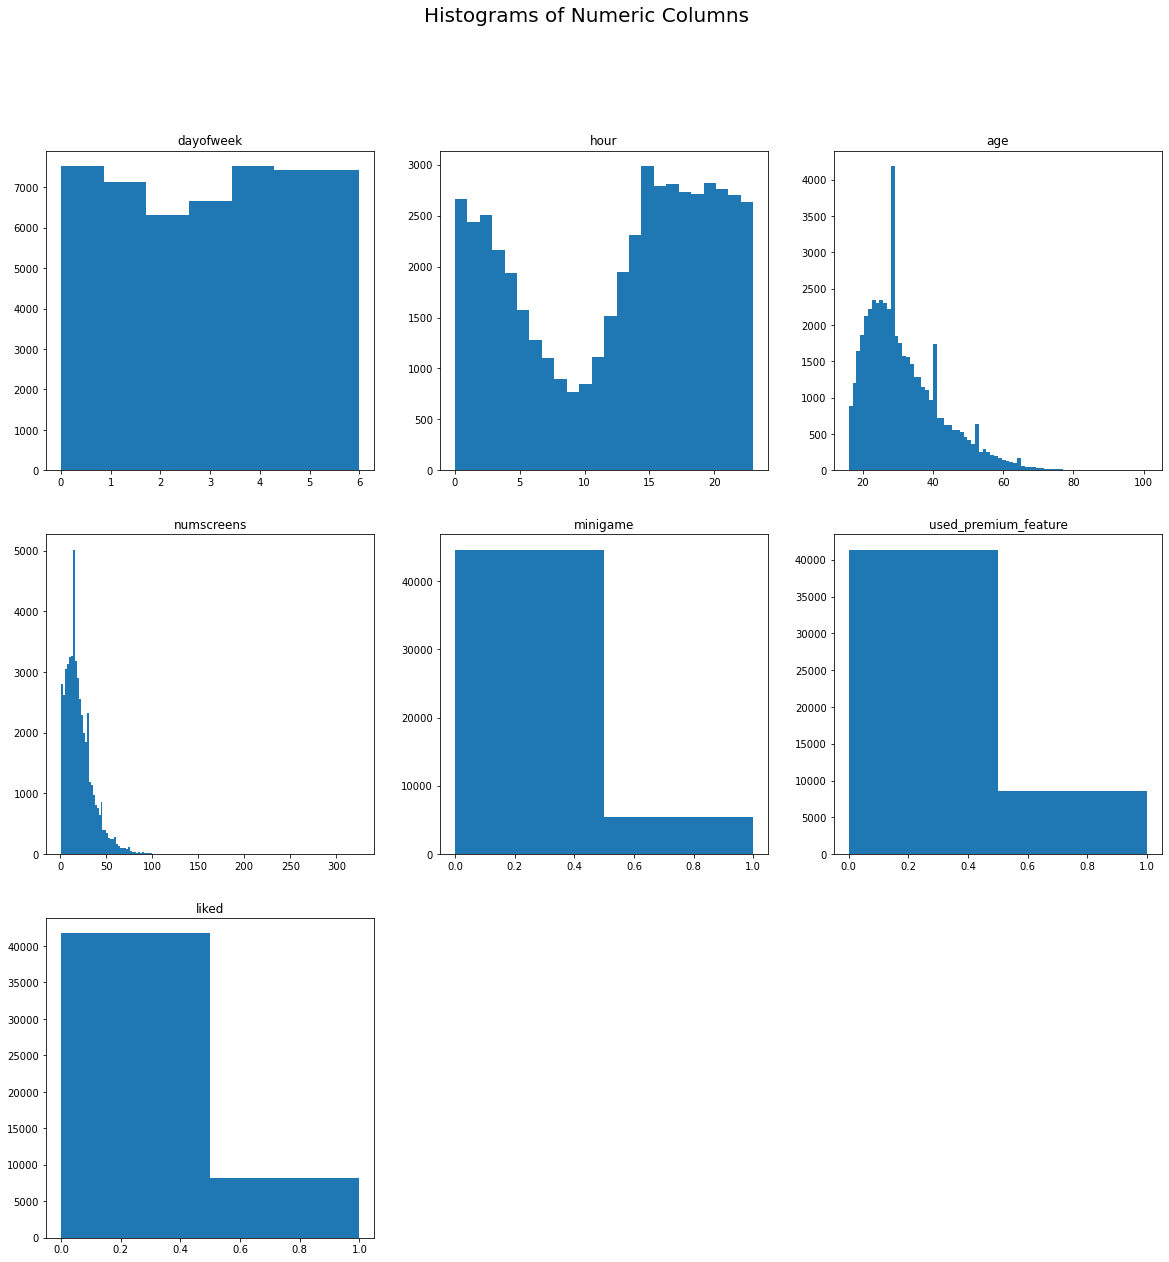

In [7]:
plt.figure(figsize=(20,20))
#plt.subplots(constrained_layout=True)
plt.suptitle('Histograms of Numeric Columns', fontsize = 20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    # 현재 Axes객체 반환
    f = plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    # 각 특성에 적합한 빈 수를 파악하기 위해 vals 생성
    # 각 열의 고유값의 갯수 구한 후 size함수에 넣어 나온 고유값의 크기를 넣어줌
    vals = np.size(dataset2.iloc[:,i-1].unique())
    # 각 히스토그램에 대해 원하는 빈의 개수 = vals
    plt.hist(dataset2.iloc[:,i-1], bins = vals)
    

In [8]:
dataset2.shape[1]

7

## Correlation with Response

#### 모델 구축 전 각 독립 특성이 반응변수에 어떤 영향을 미치는지 아는 것이 좋다.
#### 어떤 특성들이 중요한지, 모델을 어떻게 구축해야할지 진행방향을 알 수 있다.

<AxesSubplot:title={'center':'Corrrelation with Response Variable'}>

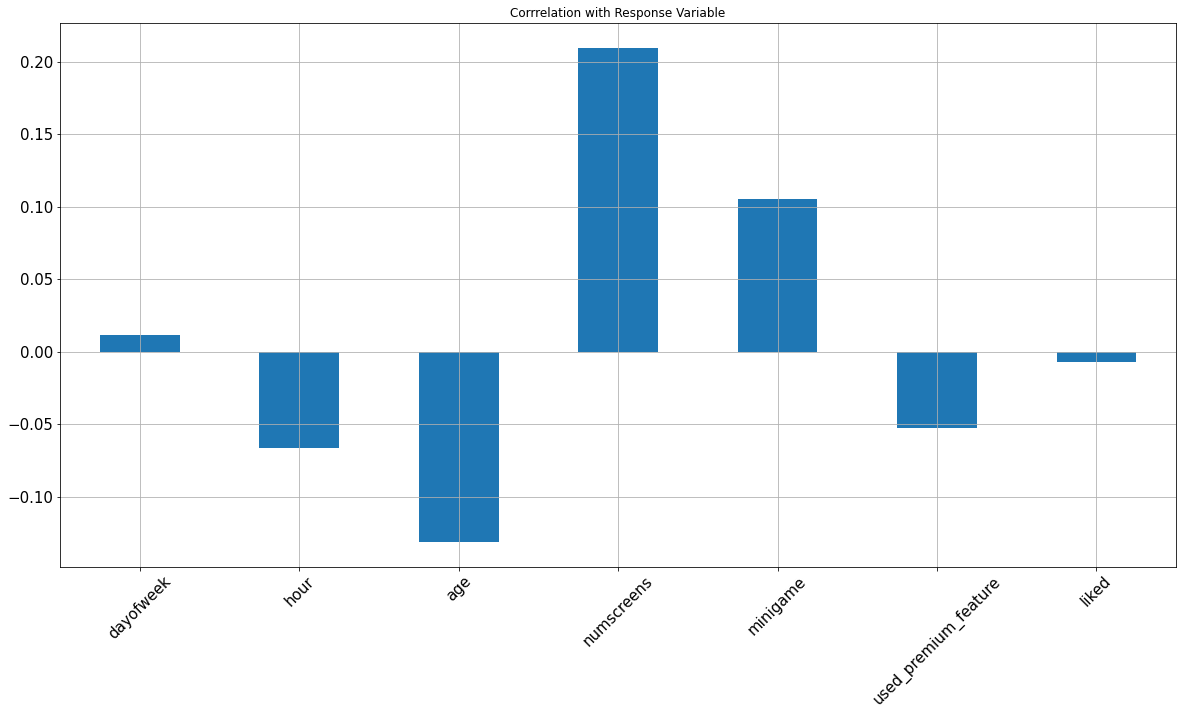

In [9]:
# rot = 45 , x축 레이블이 45도로 회전한다는 것
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                                            title = 'Corrrelation with Response Variable',
                                            fontsize= 15, rot = 45,
                                            grid = True)

dayofweek, numscreens, minigame, liked 양의 상관관계

더 많은 화면을 봤다는 것은 제품을 많이 사용했다는 것<br> 
등록할 가능성이 더 높다는 것을 의미<br>
미니게임할 가능성이 있다면 더 많이 참여할테니 등록할 가능성도 높음

hour, age, used_premium-feature 음의 상관관계

프리미엄 기능을 사용할 가능성이 높을수록 등록할 가능성이 낮아짐<br>
프리미엄 기능을 알고 있다면 제품이 마음에 들지 않거나 지불할 가치가 없기떄문에 등록 안할 수 있음

dayofweek,liked는 상관관계가 약함 ->  알아 낼 수 있는게 적음

## Correlation Matrix

#### 각 필듸와 반응변수 간이 아닌 각 개별 필드 사이의 상관관계를 제공
#### 각 필드가 어떻게 서로 관련되어 있고
#### 어떤 필드가 다른 필드에 선형적으로 의존하고 있는지
#### 어떤 필드가 다른 필드의 선형조합으로 이루어졌는지
#### 모델 구축 과정에서 도움이 됨
#### 모델의 어떤 필드도 서로 의존하지 않는 것이 좋기때문

머신러닝모델 구축할 때 하는 가정은 특성이 독립 변수라는 것 <br>
즉 서로 독립적특성 중 하나가 서로 종속되어 있으면 해당 논리가 깨지고 이상한 결과가 나옴<br>
그래서 상관행렬을 만들어 서로 지나치게 상관되는 항목이 없는지 확인

C:\Users\SEONGJ~1\AppData\Local\Temp/ipykernel_18024/1590990141.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype=np.bool)


<AxesSubplot:>

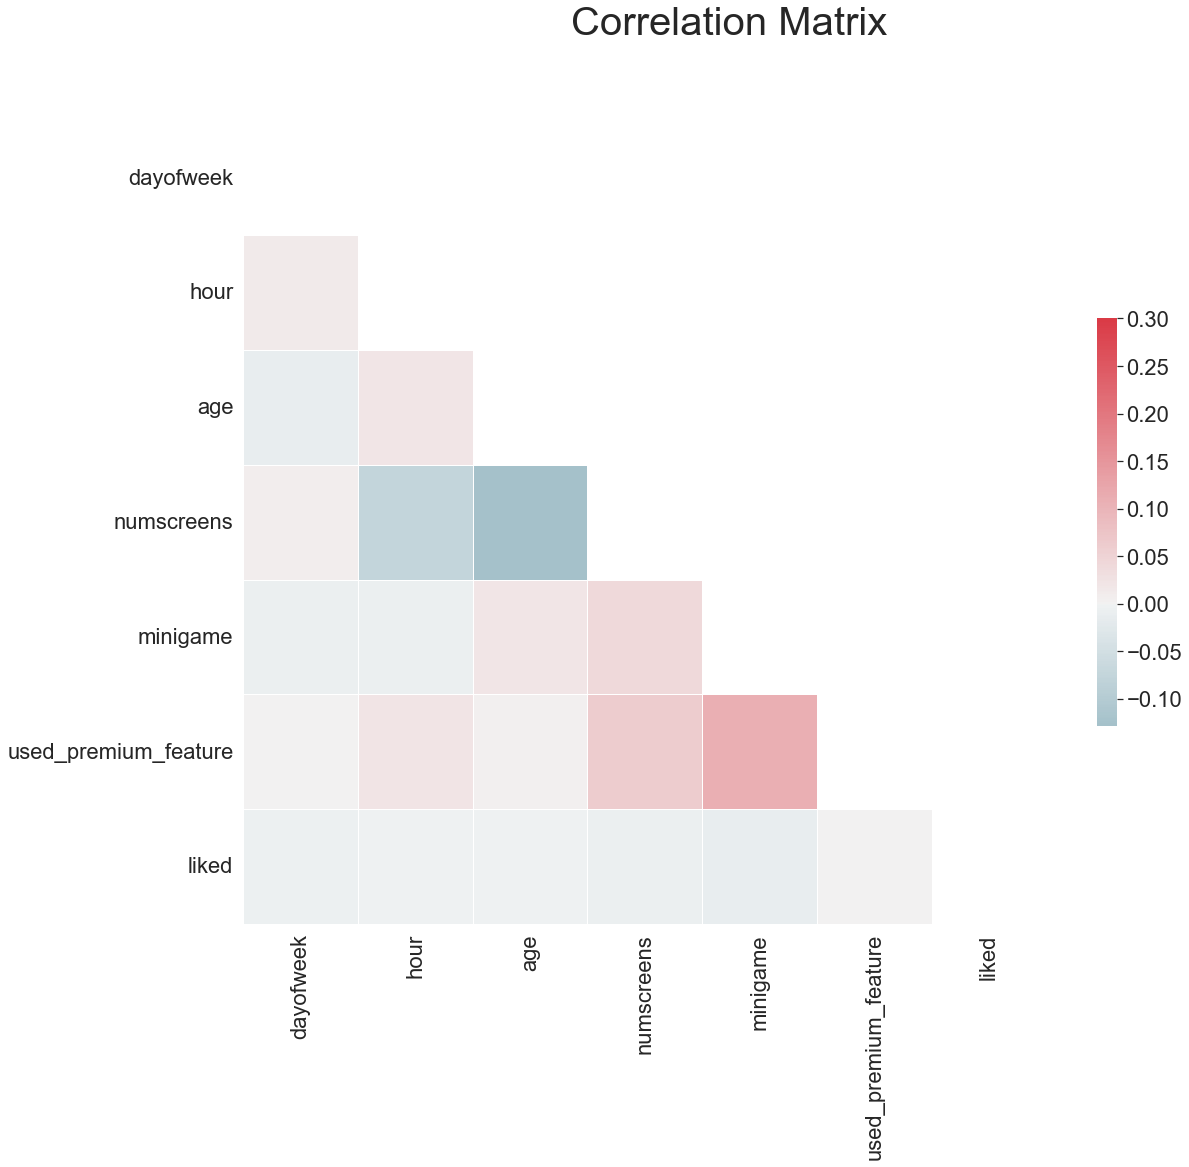

In [10]:
# 배경
sns.set(style="white", font_scale=2)

# 각 필드의 모든 상관관계 담은 2차원 배열 생성
corr = dataset2.corr()

# 위쪽 삼각 행렬에 대한 마스크 생성
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix", fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, 
            center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

dayofweek - age : 주말에 젊은 사람들이 앱을 더 쓰고 평일엔 연령대 높은 사람들이 쓴다<br>
dayofweek - hour : 요일의 후반부로 갈수록 앱을 쓰거나 연 시간이 늦어짐<br>
hour - premium : 늦은 시간일수록 프리미엄기능을 쓸 가능성이 높음<br>
hour - numscreen : 늦은 시간일수록 더 많은 화면을 볼 가능성 높음<br>
age - numscreen : 젊을수록 많은 화면을 봄- 젊은 사람들이 더 많이 참여하고 앱을 사용<br>
numscreen - premium,minigame : 많은 화면을 볼수록 프리미엄기능이거나 미니게임일 가능성 높음


## Feature Engineering

유저의 유료회원전환예상시점에 제한을 둬야함
<br>

등록을 고려하는데 일주일의 시간 제한이 있다면<br>
설치 후 일주일만 기다리면 해당 유저를 예측하는 모델의 정확도를 알 수 있음<br>
모델이 모든 시간 등록에 대해 에측했다면 모델이 정확한지 확인하기 위해 모든 시간이 끝날때까지 기다려야 함<br>
반응변수에 날짜 범위 제한을 두는 것이 중요<br>
최적의 시간 제한을 알아보기 위해 처음 앱을 연 날짜와 등록 날짜 사이의 시간 차이 분포를 도식화 할 것

In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
# 
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]

# isinstance(변수, 클래스) = 변수가 특정 틀래스의 인스턴스인지 확인하는데 사용, bool값 반환
# enrolled_date에 모든 행이 채워진 것이 아니라 parser.parse 함수에 값을 지정하지 않으면 오류발생
# 문자열인 행에만 parser적용
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

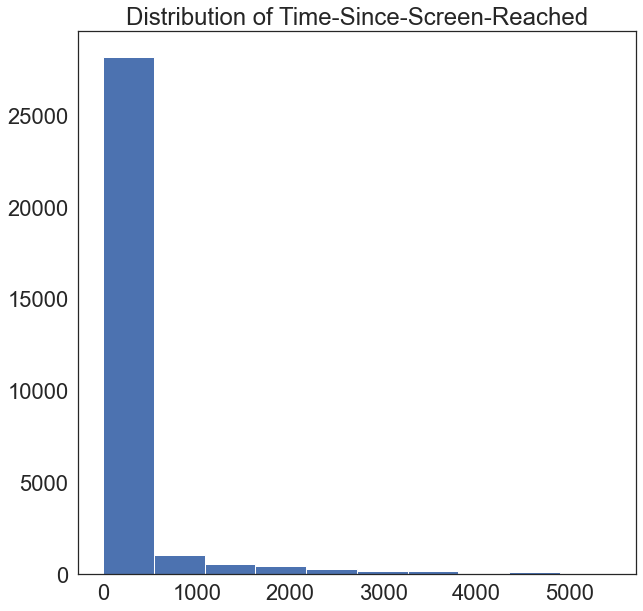

In [13]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

plt.figure(figsize=(10,10))
plt.hist(dataset["difference"].dropna())
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

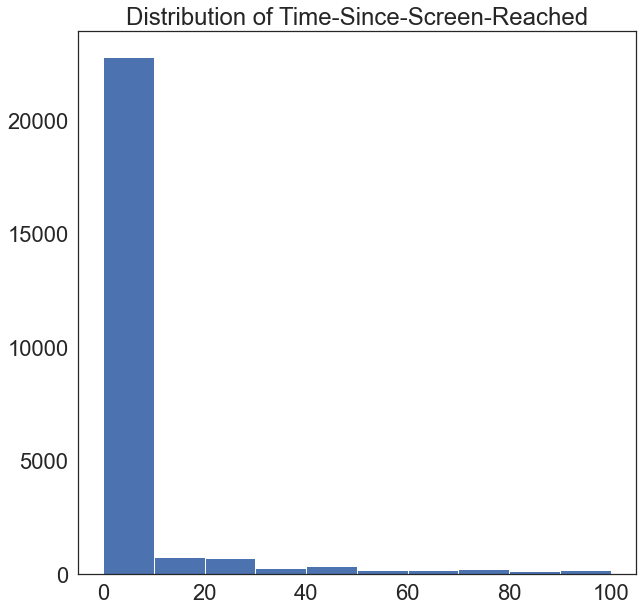

In [14]:
plt.figure(figsize=(10,10))
plt.hist(dataset["difference"].dropna(), range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

#### 모든 것이 처음 10시간 이내에 발생함
#### 30시간 이후도 훨씬 적어지지만 이벤트가 약간씩 있음
#### 대다수의 사람을 포함하기 위해 48시간으로 제한
#### 유료회원 전환 예상 시점을 48시간으로 설정

In [15]:
# 48시간 지나서 등록시 등록하지 않은 것처럼 0 넣어줌
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [16]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

## Formatting Screens to Fields

#### screen list = 방문한 화면을 쉼표로 구분한 문자열
#### 모델이 읽을 수 있는 형식으로 변환시켜줘야함
#### 각 화면을 고유한 열로 만듬
#### 그러나 화면의 종류가 너무 많아 top_screens.csv를 이용 

In [17]:
# load top_screen
top_screens = pd.read_csv('input/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [18]:
# Mapping Screens to Fields
dataset["screen_list"] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")


# Other = top_screens에 없는 항목들
dataset['Other'] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns=['screen_list'])


## Funnels

#### 퍼널은 동일한 세트에 속하는 화면 그룹

In [19]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)


In [20]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)


In [21]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)


In [22]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [50]:
#### Saving Results ####
dataset.head()
dataset.describe()
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [46]:
# data save
dataset.to_csv('new_appdata10.csv', index = False)

In [25]:
import time

In [26]:
# data load
dataset = pd.read_csv('new_appdata10.csv')

In [27]:
# Splitting Indepent and Response variables

response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [28]:
# Splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)


#### random_state 의 의미
#### 데이터를 어떤 순서로 섞을까요?라는 의미
#### 0으로 하면 원래 데이터 순서대로, 100으로 하면 100번째 데이터부터 섞이는 식
#### 학습순서따라 성능이 다르게 나올 수 있기 떄문에
#### 모델끼리 성능 비교하기 위해 random_state 통일 시켜준다.

In [29]:
# Removing Identifiers -  실제 특성이 아닌 유저ID 제거
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])


### StandardScaler
####  평균 = 0, 표준편차 = 1 로 조정해서 모든 특성이 같은 크기를 갖게함
#### fit() : 데이터를 학습시키는 메서드
#### transform() : 실제로 학습시킨 것을 적용하는 메서드
#### fit_transform() : fit()과 transform()을 한번에 처리할 수 있게 하는 메서드
#### test data에 fit, fit_transform 메서드를 쓰면 안된다,
#### test set에 fit을 헤버리면 scaler가 기존에 학습 데이터에 fit한 기준을 다 무시하고 <br>test set에 새로운 mean, variance값을 얻으면서 test set까지 학습해버린다,
### 표준 스케일링을 한 이유 : 특정 수치필드가 단지 큰 절대값을 갖고있다는 이유로 모델에 더 큰 영향을 미치면 안되기 때문
#### 나이는 18 ~ 100사이의 범위를 가질 수 있지만, 화면 열의 범위는 0 ~ 1
#### 단순히 큰 수치 때문에 모델에서 더 많은 가중치 즉 더 많은 영향력을 가지면 안된다.
#### -> 그래서 모든 특성을 정규화하는 것, 모든 특성은 수적인 양이 아닌 상관관계에 따라서만 반응변수에 영향을 줄 수 있다.


In [60]:
# Feature Scaling
# 표준 스케일러는 다차원numpy 배열을 반환
# 열이름과 인덱스가 손실 - > 다른 데이터프레임(X_train2)에 저장
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
# 원래 학습 및 테스트의 인덱스를 다시 통합
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [61]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression

# l1정규화가 하는 일 : 반응변수에 강하게 연관이 되어있는 특정 필드에 패널티 부과하는 것
classifier = LogisticRegression(random_state = 0, solver = 'liblinear', penalty = 'l1')
classifier.fit(X_train, y_train)


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [63]:
# Predicting Test Set
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [65]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# 혼동행렬 - 예상된 값의 수와 실제 값의 수를 보여주는 표
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
# 정밀도 - 모델이 true라고 분류한 것 중에서 실제로 true인 것의 비율
print(precision_score(y_test, y_pred)) # tp / (tp + fp)
# 재현율 - 실제 true인 것 중에서 모델이 true라고 예측한 것의 비율
print(recall_score(y_test, y_pred)) # tp / (tp + fn)
# 정밀도와 재현율의 조화평균, 0 ~ 1 사이 값, 1에 가까울수록 분류성능 좋음
print(f1_score(y_test, y_pred))


0.7681
0.7618952017667135
0.7700892857142857
0.7659703300030276


Test Data Accuracy: 0.7680


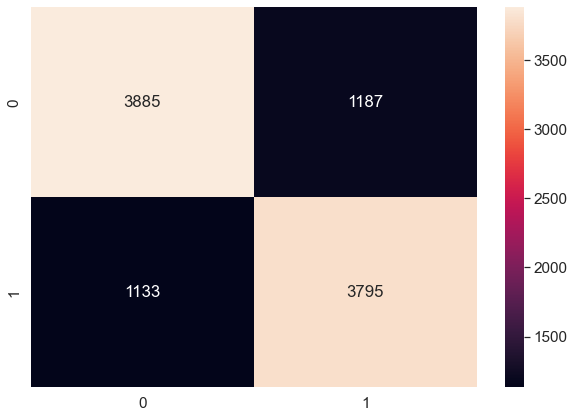

In [34]:
# 혼동행렬 도식화
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Cross Validation
### cross_val_score() : 교차검증을 위한 함수 중 하나
### 주어진 데이터 셋을 K개의 fold로 분할하고ㅡ 각 fold에서 모델을 학습시키고 검증하는 과정을 K번 반복해 모델의 성능을 평가

In [69]:
# Applying k-Fold Cross Validation
# 혼동행렬의 숫자들이 실제 맞는지 과적합된 것은 아닌지 확인하기위해
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))


SVM Accuracy: 0.767 (+/- 0.009)


In [70]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)


,features,coef
0,dayofweek,0.032572
1,hour,-0.003604
2,age,-0.149679
3,numscreens,-0.130627
4,minigame,-0.026464
5,used_premium_feature,-0.065915
6,liked,0.010692
7,location,-0.028322
8,Institutions,-0.062202
9,VerifyPhone,0.650363


In [71]:
#### Model Tuning ####

## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


Took 20.93 seconds


(0.76735, {'C': 0.01, 'penalty': 'l2'})

In [72]:
## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

Took 14.83 seconds


0.76725

### 실제 결과와 예측 결과 비교

In [68]:
# Formatting Final Results

# 예측된 결과와 실제 결과, 모델을 실행시킨 유저의 ID를 조합

final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
